## Explore fits spectra from Calspec
============================================

- author : Sylvie Dagoret-Campagne
- creation date November 16th 2016

The purpose is to view the spectrum of the stars measured in CTIO 

ftp://ftp.stsci.edu/cdbs/current_calspec/


In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [2]:
from astropy.io import fits

In [3]:
import os

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/SEDCalspec_HD205905'

In [6]:
basefilename='hd205905_stis_003.fits'

In [7]:
file=os.path.join(path,basefilename)

In [8]:
hdulist=fits.open(file)

In [9]:
hdulist.info()

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/SEDCalspec_HD205905/hd205905_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   ()              
1    SCI         BinTableHDU     39   3739R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   


## Primary extension

In [10]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-05T21:03:03' / Date FITS file was generated                  
IRAF-TLM= '2015-01-05T21:03:07' / Time of last modification                     
TARGETID= 'HD205905'           /                                                
DBTABLE = 'CRSPECTRUM'         /                                                
MAPKEY  = 'CALSPEC '           /                                                
AIRMASS =              0.00000 /Mean airmass of the observation                 
DESCRIP = 'Standard star flux with a new STIS calibration-------' /             
SOURCE  = 'Flux scale of Boh

In [11]:
print hdulist[0].header.keys()

['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'TARGETID', 'DBTABLE', 'MAPKEY', 'AIRMASS', 'DESCRIP', 'SOURCE', 'SOURCE2', 'USEAFTER', 'COMMENT', 'PEDIGREE', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'FILENAME', 'WMIN', 'WMAX', '', '', '', '', '', '', '', '', '', '', '', '']


## Secondary extension

In [12]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Wed Dec 24 09:04:47 2014       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   30 /Number of bytes per row                         
NAXIS2  =                 3739 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    7 /Number of columns                               
EXTNAME = 'SCI     '           /                                                
EXTVER  =                    1 /                                                
INHERIT =                    T /                                                
TFORM1  = '1D      '           /Real*8 (double precision)                       
TTYPE1  = 'WAVELENGTH'      

In [13]:
table_data=hdulist[1].data

In [14]:
wavelength=table_data['WAVELENGTH'] # in Angstrom

In [15]:
table_data.columns  # shows the columns names of the table

ColDefs(
    name = 'WAVELENGTH'; format = '1D'; unit = 'ANGSTROMS'; disp = 'G10.4'
    name = 'FLUX'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'STATERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'SYSERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'FWHM'; format = '1E'; unit = 'ANGSTROMS'; disp = 'G6.2'
    name = 'DATAQUAL'; format = '1I'; unit = 'NONE'; disp = 'I2'
    name = 'TOTEXP'; format = '1E'; unit = 'SEC'; disp = 'G10.2'
)

In [16]:
wavelengths=table_data.field('WAVELENGTH')/10.

In [17]:
fluxes=table_data.field('FLUX')

In [18]:
ymax=fluxes.max()*1.1
ymin=fluxes.min()

In [19]:
wl_O2Aline=759.37
wl_O2Bline=686.719
wl_Haline=656.281 
wl_Hbline=486.134
wl_Hgline=434.047 
wl_Hdline=410.175

wl_Naline=589.592+1
wl_Heline=587.5618-1


wl_Hgline=546.073
wl_Feline=527.039

SED_hd205905_stis_003.pdf


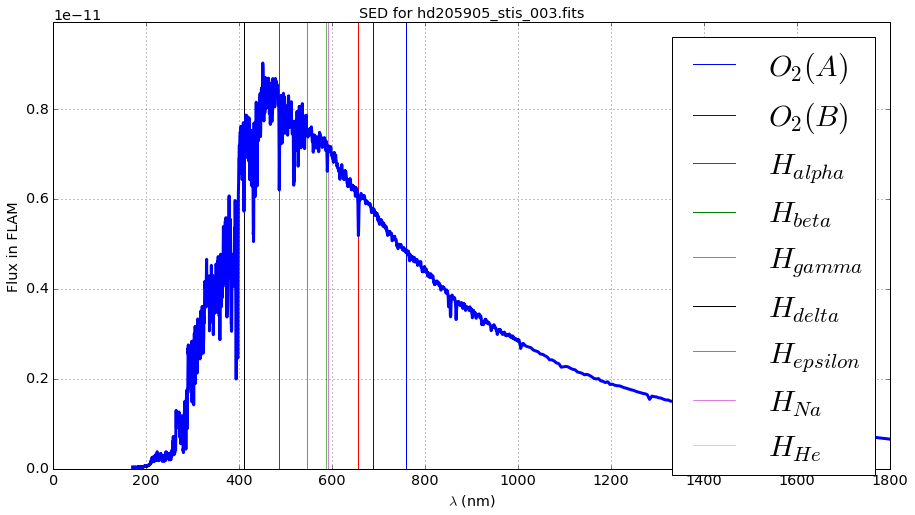

In [22]:
#plt.figure(figsize=(8.,6.))
plt.plot(wavelengths,fluxes)
title='SED for {}'.format(basefilename)
figfilename='SED_{}'.format(basefilename.split('.')[0])+'.pdf'
print figfilename
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Flux in FLAM')
plt.title(title)
plt.xlim(0.,1800.)
plt.ylim(ymin,ymax)
plt.grid(True)

plt.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
plt.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
plt.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
plt.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
plt.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
plt.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
plt.plot([wl_Heline,wl_Heline],[ymin,ymax],'c-',label='$H_{epsilon}$',lw=1)

plt.plot([wl_Naline,wl_Naline],[ymin,ymax],'m-',label='$H_{Na}$',lw=0.5)
plt.plot([wl_Heline,wl_Heline],[ymin,ymax],'y-',label='$H_{He}$',lw=0.5)

plt.plot(wavelengths,fluxes,'b-',lw=3)
plt.legend(loc='best',fontsize=30)

plt.savefig(figfilename)